In [12]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [13]:
df = pd.read_csv('abalone.csv')

trainData, testData= train_test_split(
    df, random_state=42, test_size=0.20, shuffle=False)
trainData = trainData.to_csv('abalone_train.csv')
testData = testData.to_csv('abalone_test.csv')

trainData = pd.read_csv('./abalone_train.csv')
testData = pd.read_csv('./abalone_test.csv')

In [14]:
def correlation(a,b):
    sumx=[]
    sumy=[]
    sumx2=0
    sumy2=0
    num=0
    r=0

    ma = np.mean(a)
    mb = np.mean(b)
    for i in a:
         sumx.append(i-ma)
         sumx2+=(i-ma)**2

    for i in b:
         sumy.append(i-mb)
         sumy2+=(i-mb)**2
    num = np.dot(sumx,sumy)
    den = math.pow((sumx2*sumy2),0.5)
    return round(num/den,2)

In [15]:
correlations_with_rings = {}
for attribute in trainData.columns:
    if attribute != 'Rings':
        a = trainData['Rings'].to_numpy()
        b = trainData[attribute].to_numpy()
        corr = correlation(a, b)
        correlations_with_rings[attribute] = corr

max_corr_attribute = max(correlations_with_rings, key=correlations_with_rings.get)
max_corr_value = correlations_with_rings[max_corr_attribute]

print(f"The attribute with the maximum correlation with 'Rings' is '{max_corr_attribute}' with a correlation value of {max_corr_value:.2f}")

The attribute with the maximum correlation with 'Rings' is 'Shell weight' with a correlation value of 0.64


In [16]:
X = trainData[max_corr_attribute].to_numpy()
y = trainData['Rings'].to_numpy()

def linear_regression_least_squares(X, y):


    slope = np.dot(X - np.mean(X),(y - np.mean(y)).T)/sum(pow(X - np.mean(X),2))
    intercept = np.mean(y) - np.mean(X)*slope

    return slope, intercept

slope, intercept = linear_regression_least_squares(X, y)

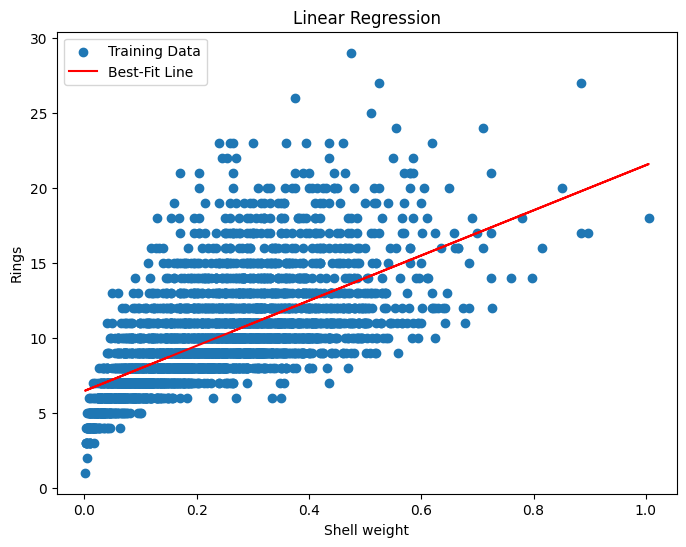

RMSE on Training Data: 2.57


In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Training Data')
plt.plot(X, slope * X + intercept, color='red', label='Best-Fit Line')
plt.xlabel(max_corr_attribute)
plt.ylabel('Rings')
plt.legend()
plt.title('Linear Regression')
plt.show()

y_pred_train = slope * X + intercept
# print(y_pred_train)

rmse_train = math.sqrt(np.mean((y - y_pred_train) ** 2))
print(f"RMSE on Training Data: {rmse_train:.2f}")

In [18]:
X_test = testData[max_corr_attribute].to_numpy()
y_test = testData['Rings'].to_numpy()

# Make predictions on the test data
y_pred_test = slope * X_test + intercept

# Calculate Root Mean Squared Error (RMSE) for the test data
rmse_test = math.sqrt(np.mean((y_test - y_pred_test) ** 2))
print(f"RMSE on Test Data: {rmse_test:.2f}")

RMSE on Test Data: 2.27


In [19]:
def trf_X(x,deg):
    x = np.array(x).reshape(1,len(x))
    for i in range(2,deg+1):
        x = np.insert(x,x.shape[0],pow(x,i),axis = 0)
    return x

def polynomial_regression(X, y, degree):
    X = trf_X(X,degree).T
    X = np.insert(X,0,1,axis=1)
    w = np.linalg.inv(np.dot(X.T,X)).dot(X.T).dot(y)
    
    return w

def predict_poly(x,w,degree):
    x = trf_X(x,degree).T
    x = np.insert(x,0,1,axis=1)
    return np.dot(x,w)


In [20]:
train_rmse_values = []
test_rmse_values = []

# Initialize variables to track the best-fit model
best_fit_degree = None
best_fit_test_rmse = float('inf')

degrees = [2, 3, 4, 5]
for degree in degrees:
    X = trainData[max_corr_attribute].to_numpy()
    y = trainData['Rings'].to_numpy()
    
    w = polynomial_regression(X, y, degree)
    
    y_pred_train = predict_poly(X,w,degree)
    
    rmse_train = math.sqrt(np.mean((y - y_pred_train) ** 2))
    train_rmse_values.append(rmse_train)
    
    X_test = testData[max_corr_attribute].to_numpy()
    y_test = testData['Rings'].to_numpy()
    
    y_pred_test = predict_poly(X_test,w,degree)
    
    rmse_test = math.sqrt(np.mean((y_test - y_pred_test) ** 2))
    test_rmse_values.append(rmse_test)
    
    if rmse_test < best_fit_test_rmse:
        best_fit_test_rmse = rmse_test
        best_fit_degree = degree
best_fit_degree

5

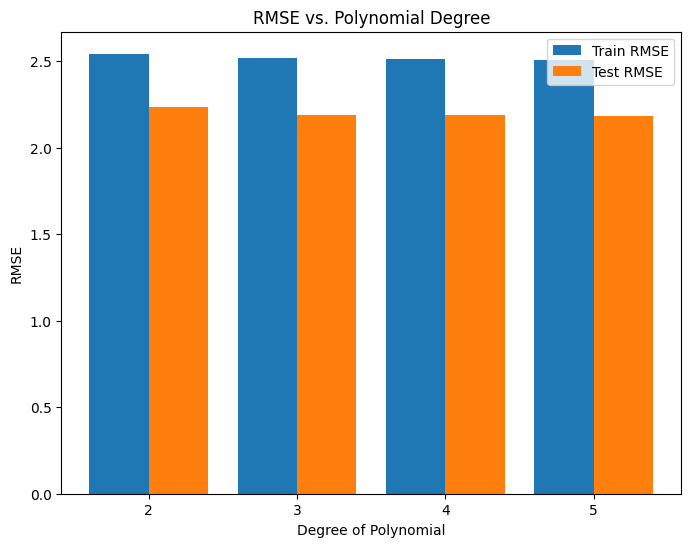

The best-fit model has a degree of 5 with a test RMSE of 2.18


In [21]:
plt.figure(figsize=(8, 6))
plt.bar(degrees, train_rmse_values, width=0.4, label='Train RMSE')
plt.bar(np.array(degrees) + 0.4, test_rmse_values, width=0.4, label='Test RMSE')
plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.xticks(np.array(degrees) + 0.2, degrees)
plt.legend()
plt.title('RMSE vs. Polynomial Degree')
plt.show()

print(f"The best-fit model has a degree of {best_fit_degree} with a test RMSE of {best_fit_test_rmse:.2f}")


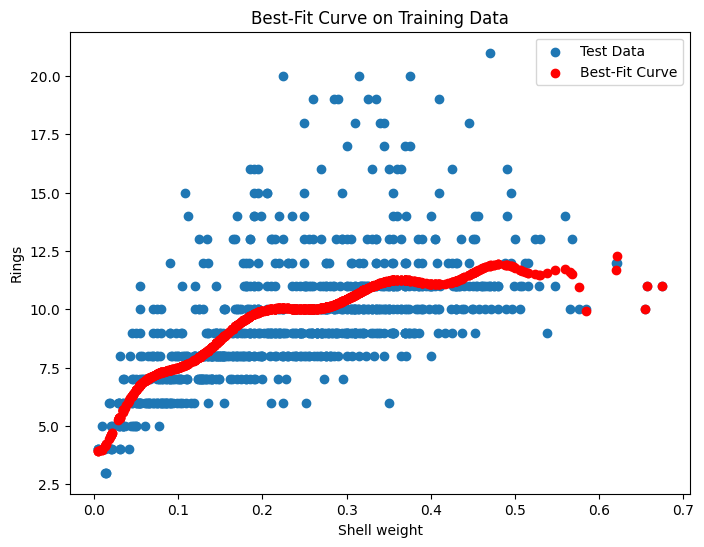

In [22]:
X = testData[max_corr_attribute].to_numpy()
y = testData['Rings'].to_numpy()
w = polynomial_regression(X, y, best_fit_degree)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, label='Test Data')
x_range = np.linspace(X.min(), X.max(), 100)
plt.scatter(X, predict_poly(X,w,best_fit_degree), color='red', label='Best-Fit Curve')
plt.xlabel(max_corr_attribute)
plt.ylabel('Rings')
plt.legend()
plt.title('Best-Fit Curve on Training Data')
plt.show()